In [8]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

In [2]:
import pandas as pd

file = '/Users/quartz/data/collabo/adult.csv'
data_raw = pd.read_csv(file)
data_raw.tail()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### EDA

In [3]:
# dependent variable(y) <=50K = 1, >50K = 0

data_raw.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [4]:
# age

data_raw.age.value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [5]:
# workclass

data_raw.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [6]:
data_raw.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [5]:
data_revise = data_raw[['age', 'income']]
data_revise.sort_values(by='age', inplace=True)
data_revise = data_revise.reset_index(drop=True)
data_revise.income = data_revise.income.apply(lambda x : 0 if x == '<=50K' else 1)
data_revise.tail()

,age,income
32556,90,0
32557,90,0
32558,90,0
32559,90,0
32560,90,0


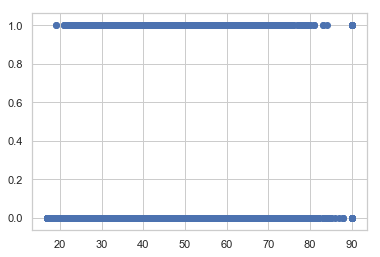

In [9]:
x = data_revise.age
y = data_revise.income

plt.scatter(x, y)

### preprocessing

In [11]:
data_revise.tail()

,age,income
32556,90,0
32557,90,0
32558,90,0
32559,90,0
32560,90,0


In [22]:
data = data_revise.age

In [23]:
def seq2dataset(seq, window_size):

    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append(subset)
    return np.array(dataset)

dataset = seq2dataset(data, window_size=4)
dataset.shape, dataset

((32557, 5), array([[17, 17, 17, 17, 17],
        [17, 17, 17, 17, 17],
        [17, 17, 17, 17, 17],
        ...,
        [90, 90, 90, 90, 90],
        [90, 90, 90, 90, 90],
        [90, 90, 90, 90, 90]]))

In [24]:
# scaling

min_value = min(data)
max_value = max(data)

min_value, max_value

(17, 90)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
X_train = dataset.copy()

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
from keras.utils import np_utils
import keras

y_train = data_revise.income
y_train = y_train[:-4]
y_train = np_utils.to_categorical(y_train)

In [41]:
X_train.shape, y_train.shape

((32557, 5), (32557, 2))

### modeling

In [42]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
history = LossHistory() 
history.init()

In [43]:
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,LSTM

In [44]:
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=2, callbacks=[history])

Epoch 1/100
 - 3s - loss: 0.5040 - acc: 0.7583
Epoch 2/100
 - 2s - loss: 0.4888 - acc: 0.7592
Epoch 3/100
 - 2s - loss: 0.4879 - acc: 0.7592
Epoch 4/100
 - 2s - loss: 0.4875 - acc: 0.7592
Epoch 5/100
 - 2s - loss: 0.4870 - acc: 0.7592
Epoch 6/100
 - 2s - loss: 0.4867 - acc: 0.7592
Epoch 7/100
 - 2s - loss: 0.4862 - acc: 0.7592
Epoch 8/100
 - 2s - loss: 0.4859 - acc: 0.7592
Epoch 9/100
 - 2s - loss: 0.4859 - acc: 0.7592
Epoch 10/100
 - 2s - loss: 0.4861 - acc: 0.7592
Epoch 11/100
 - 2s - loss: 0.4859 - acc: 0.7592
Epoch 12/100
 - 2s - loss: 0.4861 - acc: 0.7592
Epoch 13/100
 - 2s - loss: 0.4855 - acc: 0.7592
Epoch 14/100
 - 2s - loss: 0.4856 - acc: 0.7592
Epoch 15/100
 - 2s - loss: 0.4860 - acc: 0.7592
Epoch 16/100
 - 2s - loss: 0.4857 - acc: 0.7592
Epoch 17/100
 - 2s - loss: 0.4856 - acc: 0.7592
Epoch 18/100
 - 2s - loss: 0.4858 - acc: 0.7592
Epoch 19/100
 - 2s - loss: 0.4856 - acc: 0.7592
Epoch 20/100
 - 2s - loss: 0.4856 - acc: 0.7592
Epoch 21/100
 - 2s - loss: 0.4854 - acc: 0.7592
E

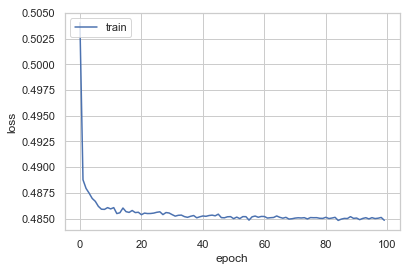

In [47]:
# loss function graph

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [48]:
scores = model.evaluate(X_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

32557/32557 [==============================] - 1s 23us/step
acc: 75.92%


### 결론

- sequence하지 않은 데이터를 RNN 모델에 넣고 돌리니 제대로 학습이 이루어지지 않는다. 
- 데이터에 따라 걸맞는 알고리즘을 사용해야 퍼포먼스도 좋고, 비용(시간, 파워)도 줄일 수 있다.